In [4]:
import numpy as np
import matplotlib.pyplot as plt
import HomeMade as hm
import importlib
import pandas as pd

In [5]:
df = pd.read_pickle('Lambda_predictions.dat')
df.head()

,v0_la_mass,v0_la_massErr,ML1_data,ML2_data,ML12_data
entry,,,,,
4718704,1123.022461,4.387031,0.478339,0.380436,0.445044
4718720,1120.940308,4.884987,0.375807,0.303683,0.449837
4718778,1137.346436,2.615136,0.205639,0.309596,0.254735
4718782,1117.224976,2.894648,0.345457,0.283652,0.365771
4718784,1144.514038,6.733259,0.394889,0.358354,0.445140


In [6]:
hm = importlib.reload(hm)
mass_range = (1090,1145)
Npoints = 120
auc, cuts, x, y = hm.roc_curve_data(df.v0_la_mass,df.ML12_data,Npoints=Npoints,bins=200,verbose=False,type='la',range=mass_range)
auc1, cuts1, x1, y1 = hm.roc_curve_data(df.v0_la_mass,df.ML1_data,Npoints=Npoints,bins=200,verbose=False,type='la',range=mass_range)
auc2, cuts2, x2, y2 = hm.roc_curve_data(df.v0_la_mass,df.ML2_data,Npoints=Npoints,bins=200,verbose=False,type='la',range=mass_range)

No valid minimum found!


C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\jv97\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


In [21]:
xo, yo = x.copy(), y.copy()
x1o, y1o = x1.copy(), y1.copy()
x2o, y2o = x2.copy(), y2.copy()

In [36]:
# x, y = xo.copy(), yo.copy()
x[-2:] =np.ones(2)

y2[-1] = 1
y[-18:] = np.ones(18)
y1[-25:] = np.ones(25)

In [37]:
def draw_mass_dist(p,cuts,cut_index):
    p_cut = np.sort(p)[::-1][cuts[cut_index]]
    vals,binc,binw = hm.hist(df.v0_la_mass[p>=p_cut],bins=200)
    return binc, vals

In [38]:
x

array([0.        , 0.00501667, 0.00743053, 0.009738  , 0.01886903,
       0.02154586, 0.02530611, 0.02972461, 0.03540308, 0.04163799,
       0.04716964, 0.05576496, 0.0641306 , 0.07279892, 0.0814623 ,
       0.09008791, 0.0986939 , 0.10734533, 0.11599418, 0.12455133,
       0.13321662, 0.1418708 , 0.15054869, 0.15917053, 0.1678692 ,
       0.17647007, 0.1851229 , 0.19379136, 0.20246027, 0.21112918,
       0.21979809, 0.228467  , 0.23713591, 0.24580482, 0.25447374,
       0.26314264, 0.27181155, 0.28048046, 0.28914937, 0.29781828,
       0.30648719, 0.3151561 , 0.32382501, 0.33249392, 0.34116283,
       0.34983174, 0.35850065, 0.36716956, 0.37583847, 0.38450738,
       0.39317629, 0.4018452 , 0.41051411, 0.41918302, 0.42785193,
       0.43652084, 0.44518975, 0.45385866, 0.46252757, 0.47119648,
       0.47986539, 0.4885343 , 0.49720321, 0.50587212, 0.51454103,
       0.52320994, 0.53187886, 0.54054777, 0.54921667, 0.55788559,
       0.5665545 , 0.5752234 , 0.58389232, 0.59256123, 0.60123

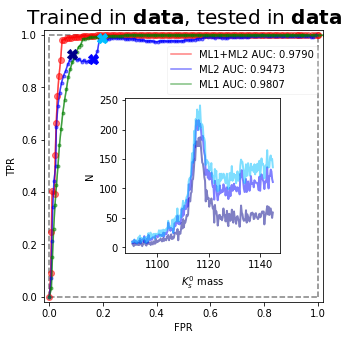

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set(xlim = (-0.02, 1.02), ylim = (-0.02, 1.02),
      xlabel='FPR',ylabel='TPR')
ax.set_title(r'Trained in $\bf{data}$, tested in $\bf{data}$',fontsize=20)
ax.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ax.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)

ax.plot(x,y,c='r',alpha=0.5,label=f'ML1+ML2 AUC: {np.trapz(y,x):.4f}')
ax.plot(x2,y2,c='b',alpha=0.5,label=f'ML2 AUC: {np.trapz(y2,x2):.4f}')
ax.plot(x1,y1,c='g',alpha=0.5,label=f'ML1 AUC: {np.trapz(y1,x1):.4f}')

ax.plot(x,y,c='r',marker='o',alpha=0.5)
ax.plot(x2,y2,c='b',marker='.',alpha=0.5)
ax.plot(x1,y1,c='g',marker='.',alpha=0.5)
# ax.plot(1-x1,1-y1,c='g',marker='o',alpha=0.5)

ax.legend(loc='upper right',framealpha=0.2,bbox_to_anchor=(1,0.96))

ad = fig.add_axes((0.35,0.26,0.43,0.43))
ad.set(xlabel='$K_s^0$ mass',ylabel='N')

# cut_index = 50
# ad.plot(*draw_mass_dist(df.ML12_data,cuts,cut_index),c='r',linewidth=3,alpha=0.5)
# ax.plot(x[cut_index],y[cut_index],c='r',marker='X',markersize=10)

# cut_index2 = 3
# ad.plot(*draw_mass_dist(df.ML2_MC,cuts2,cut_index2),c='b',linewidth=3,alpha=0.5)
# ax.plot(x2[cut_index2],y2[cut_index2],c='b',marker='X',markersize=10)

cut_index2 = 14 #int(len(cuts)*0.3)
ad.plot(*draw_mass_dist(df.ML2_data,cuts2,cut_index2),c='darkblue',linewidth=2,alpha=0.5)
ax.plot(x2[cut_index2],y2[cut_index2],c='darkblue',marker='X',markersize=10)
cut_index2 = 23 #int(len(cuts)*0.5)
ad.plot(*draw_mass_dist(df.ML2_data,cuts2,cut_index2),c='blue',linewidth=2,alpha=0.5)
ax.plot(x2[cut_index2],y2[cut_index2],c='blue',marker='X',markersize=10)
cut_index2 = 27 #int((len(cuts)-1)*1)
ad.plot(*draw_mass_dist(df.ML2_data,cuts2,cut_index2),c='deepskyblue',linewidth=2,alpha=0.5)
ax.plot(x2[cut_index2],y2[cut_index2],c='deepskyblue',marker='X',markersize=10)

# cut_index1 = 18 #int(len(cuts)*0.3)
# ad.plot(*draw_mass_dist(df.ML1_data,cuts1,cut_index1),c='darkgreen',linewidth=3,alpha=0.9)
# ax.plot(x1[cut_index1],y1[cut_index1],c='darkgreen',marker='X',markersize=10)
# cut_index1 = 37 #int(len(cuts)*0.5)
# ad.plot(*draw_mass_dist(df.ML1_data,cuts1,cut_index1),c='forestgreen',linewidth=3,alpha=0.9)
# ax.plot(x1[cut_index1],y1[cut_index1],c='forestgreen',marker='X',markersize=10)
# cut_index1 = 57 #int((len(cuts)-1)*1)
# ad.plot(*draw_mass_dist(df.ML1_data,cuts1,cut_index1),c='limegreen',linewidth=3,alpha=0.9)
# ax.plot(x1[cut_index1],y1[cut_index1],c='limegreen',marker='X',markersize=10)

In [44]:
# fig.savefig('figures/3roc_curves_mc_trained_lambda.pdf')

In [134]:
hm = importlib.reload(hm)
Npoints = 70
auc, cuts, x, y = hm.roc_curve_data(df.v0_ks_mass,1-df.ML12_data,Npoints=Npoints,bins=200,verbose=False)
auc1, cuts1, x1, y1 = hm.roc_curve_data(df.v0_ks_mass,1-df.ML1_data,Npoints=Npoints,bins=200,verbose=False)
auc2, cuts2, x2, y2 = hm.roc_curve_data(df.v0_ks_mass,1-df.ML2_data,Npoints=Npoints,bins=200,verbose=False)

No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!
No valid minimum found!


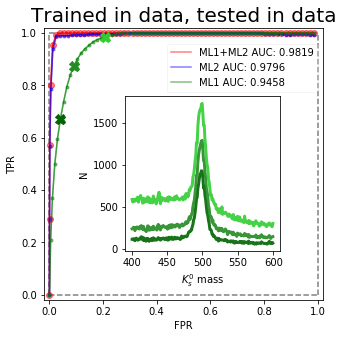

In [145]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set(xlim = (-0.02, 1.02), ylim = (-0.02, 1.02),
      xlabel='FPR',ylabel='TPR')
ax.set_title('Trained in data, tested in data',fontsize=20)
ax.vlines([0,1],0,1,ls='--',color='gray',zorder=-1)
ax.hlines([0,1],0,1,ls='--',color='gray',zorder=-1)

ax.plot(x,y,c='r',alpha=0.5,label=f'ML1+ML2 AUC: {np.trapz(y, x):.4f}')
ax.plot(x2,y2,c='b',alpha=0.5,label=f'ML2 AUC: {np.trapz(y2, x2):.4f}')
ax.plot(x1,y1,c='g',alpha=0.5,label=f'ML1 AUC: {np.trapz(y1, x1):.4f}')

ax.plot(x,y,c='r',marker='o',alpha=0.5)
ax.plot(x2,y2,c='b',marker='.',alpha=0.5)
ax.plot(x1,y1,c='g',marker='.',alpha=0.5)
# ax.plot(1-x1,1-y1,c='g',marker='o',alpha=0.5)

ax.legend(loc='upper right',framealpha=0.2,bbox_to_anchor=(1,0.96))

ad = fig.add_axes((0.35,0.26,0.43,0.43))
ad.set(xlabel='$K_s^0$ mass',ylabel='N')

# cut_index = 4
# ad.plot(*draw_mass_dist(df.ML12_MC,cuts,cut_index),c='r',linewidth=3,alpha=0.5)
# ax.plot(x[cut_index],y[cut_index],c='r',marker='X',markersize=10)

# cut_index2 = 3
# ad.plot(*draw_mass_dist(df.ML2_MC,cuts2,cut_index2),c='b',linewidth=3,alpha=0.5)
# ax.plot(x2[cut_index2],y2[cut_index2],c='b',marker='X',markersize=10)

cut_index1 = 5
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='darkgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='darkgreen',marker='X',markersize=10)
cut_index1 = 9
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='forestgreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='forestgreen',marker='X',markersize=10)
cut_index1 = 17
ad.plot(*draw_mass_dist(df.ML1_MC,cuts1,cut_index1),c='limegreen',linewidth=3,alpha=0.9)
ax.plot(x1[cut_index1],y1[cut_index1],c='limegreen',marker='X',markersize=10)

In [147]:
# fig.savefig('figures/3roc_curves_data_trained.pdf')

[Text(0, 0.5, 'ML2 prediction scores'), Text(0.5, 0, 'ML1 prediction scores')]

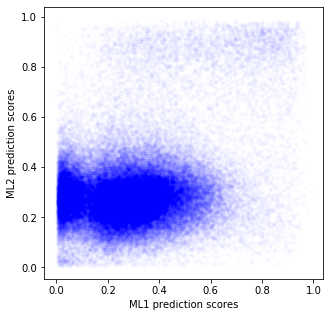

In [29]:
p1 = df.ML1_data
p2 = df.ML2_data

# p1 = p1 - p1.min()
# p1 = p1/p1.max()

# p2 = p2 - p2.min()
# p2 = p2/p2.max()

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(p1,p2,'b.',alpha=0.01)
ax.set(xlabel='ML1 prediction scores',ylabel='ML2 prediction scores')

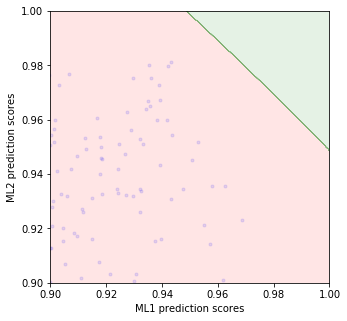

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(p1,p2,'b.',alpha=0.1)
ax.set(xlabel='ML1 prediction scores',ylabel='ML2 prediction scores',xlim=(0.9,1),ylim=(0.9,1))
mesh = np.meshgrid(np.linspace(0.9,1,30),np.linspace(0.9,1,30))
mesh = np.mgrid[0.9:1:0.1/2000,0.9:1:0.1/2000]
ax.contourf(mesh[0],mesh[1],np.where(mesh[0]**2 + mesh[1]**2 > 1.9,1,0),alpha=0.1,colors=['red','green']+5*['green'])

In [31]:
indeces = np.argsort(p1**2 + p2**2)[::-1]

<ErrorbarContainer object of 3 artists>

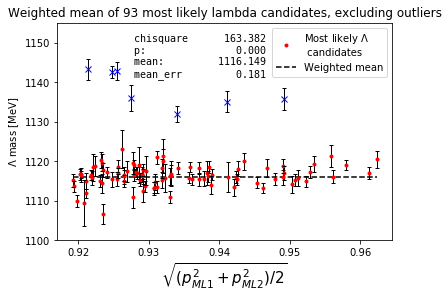

In [57]:
hm = importlib.reload(hm)
fig, ax = plt.subplots()

selection = df.iloc[indeces[:100]]


d = hm.weighted_mean(selection[selection.v0_la_mass <1130].v0_la_mass,selection[selection.v0_la_mass <1130].v0_la_massErr,
                     ax=ax,plot_ticks=np.sqrt((p1**2 + p2**2)/2).iloc[indeces[:100]][selection.v0_la_mass <1130],
                    coords=(0.23,0.95), point_label='Most likely $\Lambda$ \n candidates')
ax.set_xlabel('$\sqrt{(p_{ML1}^2 + p_{ML2}^2)/2}$',fontsize=15)
ax.set_ylabel('$\Lambda$ mass [MeV]')
ax.set_title('Weighted mean of 93 most likely lambda candidates, excluding outliers')
ax.set(ylim=(1100,1155))

ax.plot(np.sqrt((p1**2 + p2**2)/2).iloc[indeces[:100]][selection.v0_la_mass >1130],
        selection[selection.v0_la_mass >1130].v0_la_mass,
       c='b',marker='x',ls='none')
ax.errorbar(np.sqrt((p1**2 + p2**2)/2).iloc[indeces[:100]][selection.v0_la_mass >1130],
           selection[selection.v0_la_mass >1130].v0_la_mass,
           selection[selection.v0_la_mass >1130].v0_la_massErr,c='k',elinewidth=1,
           capsize=2,ls='none')

In [58]:
# fig.savefig('figures/Lambda_mass_result2.pdf')

In [38]:
df.iloc[indeces[:100]].v0_la_mass

entry
5860233    True
4989958    True
5184267    True
5337122    True
5484577    True
           ... 
5184355    True
5215172    True
4889336    True
5345198    True
5215189    True
Name: v0_la_mass, Length: 100, dtype: bool

In [261]:
hm = importlib.reload(hm)

masses = []
errs = []
chi2s = []
pvals = []

the_range = range(600,4,-20)
for i in the_range:
    mass, err, d = hm.weighted_mean(df.iloc[indeces[:i]].v0_ks_mass,df.iloc[indeces[:i]].v0_ks_massErr)
    masses.append(mass)
    errs.append(err)
    chi2s.append(d['chi2'])
    pvals.append(d['p'])

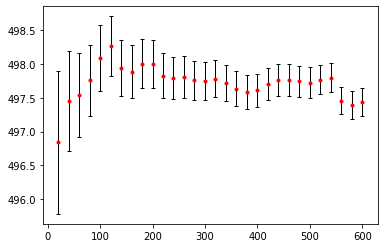

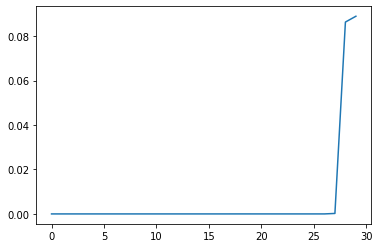

In [262]:
fig, ax = plt.subplots()

ax.plot(the_range,masses,'r.')
ax.errorbar(the_range,masses,errs,c='k',elinewidth=1,capsize=2,ls='none')

fig, ax = plt.subplots()
ax.plot(pvals)

In [256]:
errs

[0.3580983914729975,
 0.35605312920146165,
 0.34956905307819247,
 0.34981921994943754,
 0.3485666149640736,
 0.3534534871722264,
 0.35372737236934515,
 0.35772895918520337,
 0.3591663713825997,
 0.35983949822638156,
 0.3572494993123311,
 0.360617637057392,
 0.35599648966569464,
 0.35949707800902736,
 0.3578628343565742,
 0.36177774553010045,
 0.35745030057295396,
 0.36445036251973656,
 0.36980524071187176,
 0.3645761653560305,
 0.36740547378333094,
 0.36590049311385614,
 0.3688905173249412,
 0.36292366344666427,
 0.3735838775109088,
 0.3738411207879489,
 0.37349537684229495,
 0.3754318680734653,
 0.37658151011477553,
 0.3817438874755042,
 0.3818132278492315,
 0.37712626741300126,
 0.3834512433613543,
 0.3810603349345664,
 0.38906919749259755,
 0.37835918510962335,
 0.3695321975639491,
 0.38154880915677236,
 0.3885529764117904,
 0.3793210442270214,
 0.38609391321752046,
 0.38410042872832983,
 0.3841285470578835,
 0.3892997429343137,
 0.39450058600935095,
 0.39294054697204484,
 0.3909390